# Outlier detection on a real-world dataset

This example is taken from the scikit-learn libraray where we show the performance of the pyISC Outlier Detector on a real-world dataset
(For details see http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html). Below, we create a bivariate Gaussian outlier detector and compares it three detectors from scikit-learn.

Automatically created module for IPython interactive environment


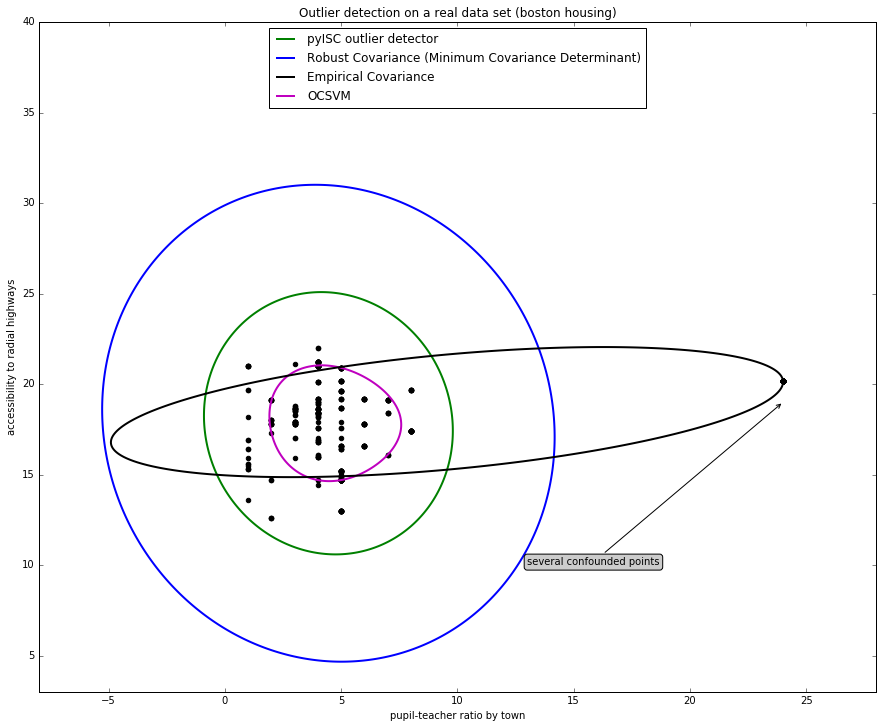

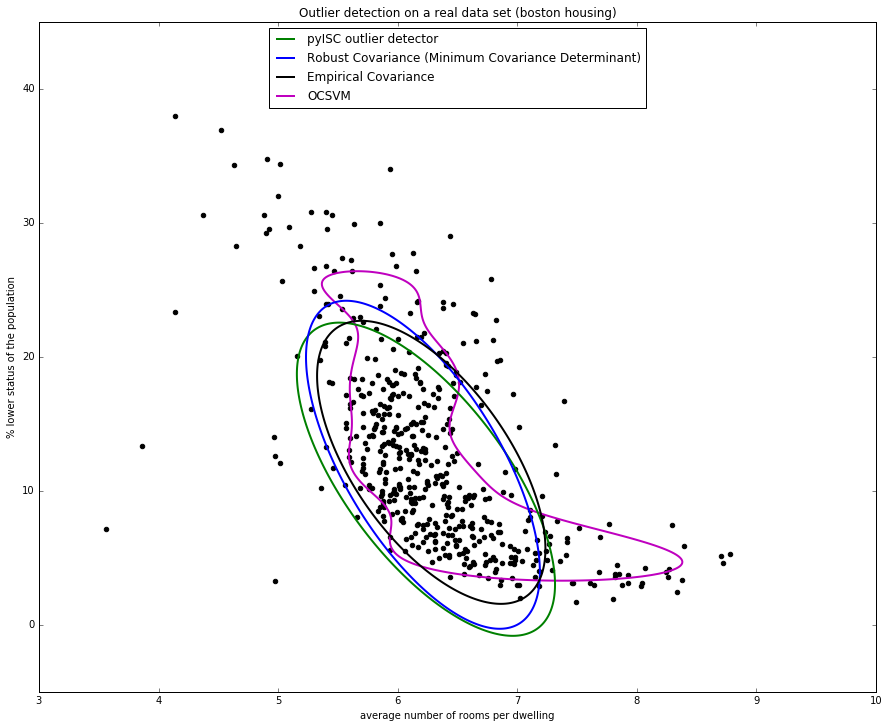

In [4]:
print(__doc__)
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# Modified for pyISC: Tomas Olsson <tol@sics.se> 
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston
import pyisc

%matplotlib inline

plt.rcParams['figure.figsize'] = (15.0, 12.0)


# Get data
X1 = load_boston()['data'][:, [8, 10]]  # two clusters
X2 = load_boston()['data'][:, [5, 12]]  # "banana"-shaped

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1., contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05),
    "pyISC outlier detector": 
    pyisc.SklearnOutlierDetector(0.261, 
        [
            pyisc.P_Gaussian([0,1]), 
        ],  
        pyisc.cr_max)
    }
colors = ['m', 'g', 'b', 'k']
legend1 = {}
legend2 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0],
            legend1_values_list[3].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2], legend1_keys_list[3]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0],
            legend2_values_list[3].collections[0]),
           (legend2_keys_list[0],legend2_keys_list[1], legend2_keys_list[2], legend2_keys_list[3]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()

From the above plots, we can see that the pyISC Outlier Detector creates a quite good decision border around the inline data points in the first figure, while the Robust covariance (that has a similar statistical model as the pyISC detector) gives the outliers too much influence. In the second figure, we see that the pyISC has a very similar performance as Robust covariance and the Empirical covariance and it is not easy to see which of them fits the data teh best.